1. PCA

Slope = 0.9999999999999999 Intercept = 0.024397436542722306


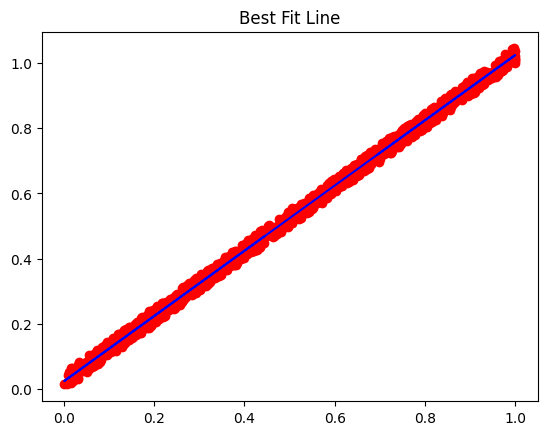

Slope = 0.9999999999999997 Intercept = -0.13917677387051175


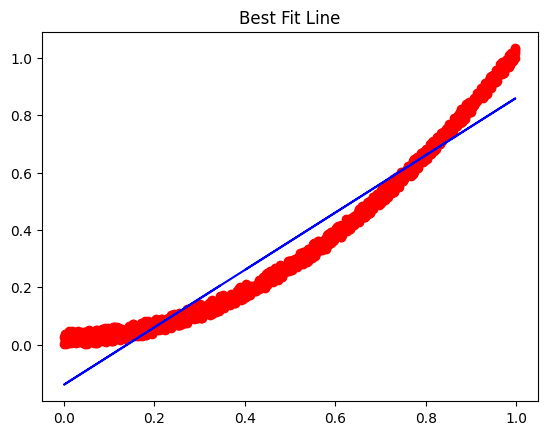

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def data1():
    x = [np.random.rand() for i in range(1000)]
    y = [x[i] + 0.05*np.random.rand() for i in range(1000)]
    return [x, y]

def data2():
    x = [np.random.rand() for i in range(1000)]
    y = [(x[i])**2 + 0.05*np.random.rand() for i in range(1000)]
    return [x, y]

# Standardisation of Data
def std_data(nparray):
    mean = np.mean(nparray, axis=1, keepdims=True)
    std_dev = np.std(nparray, axis=1, keepdims=True)
    standardized_data = (nparray - mean) / std_dev
    return standardized_data

def pca(data, n_components=1):
    # Standardize the data
    data_std = std_data(data)

    # Compute the covariance matrix
    covariance_matrix = np.cov(data_std)

    # Compute eigenvectors and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Sort the eigenvectors by decreasing eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top k eigenvectors
    eigenvector_subset = sorted_eigenvectors[:, :n_components]

    # Project the data onto the lower-dimensional subspace
    reduced_data = np.dot(eigenvector_subset.T, data_std)

    return reduced_data, eigenvector_subset

def DimReduction(arr):
    data_set = np.array(arr)

    # Apply PCA
    reduced_data, eigenvector_subset = pca(data_set)

    # Best fit line parameters
    m = eigenvector_subset[1, 0] / eigenvector_subset[0, 0]
    c = np.mean(data_set[1]) - m * np.mean(data_set[0])

    # Displaying the result using matplotlib
    plt.scatter(data_set[0], data_set[1], color = "red")
    plt.plot(data_set[0], data_set[0]*m + c, color="blue")
    print("Slope =", m, "Intercept =", c)
    plt.title("Best Fit Line")
    plt.show()

DimReduction(data1())
DimReduction(data2())


2. Kernal PCA


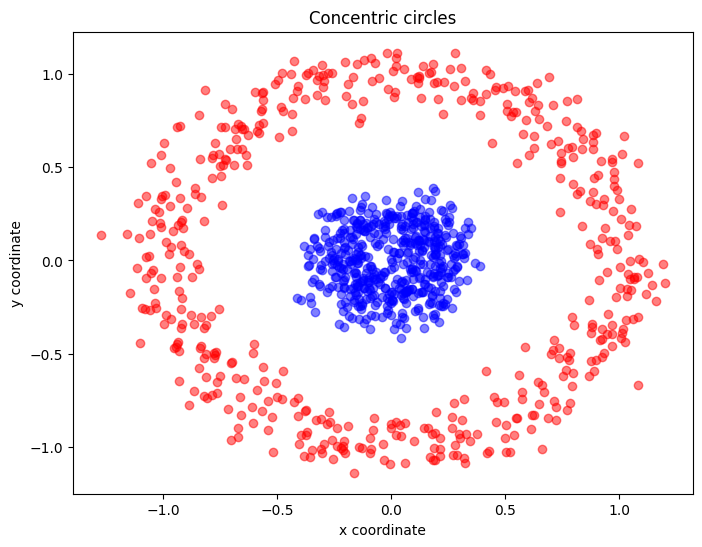

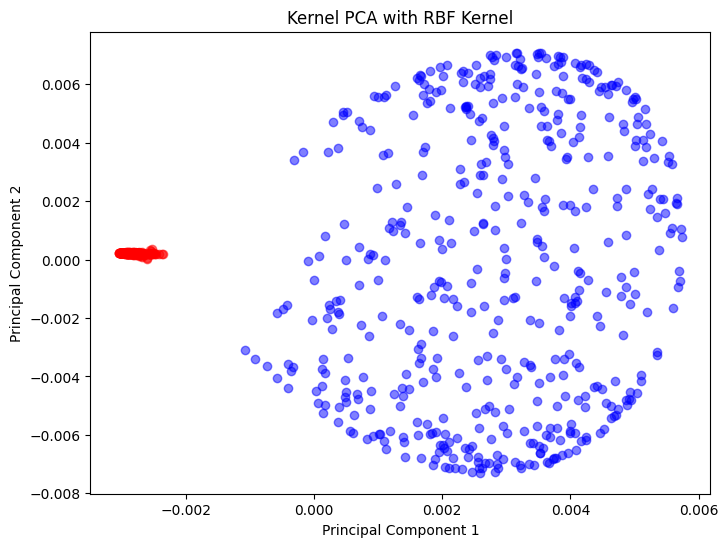

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Generate the dataset
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.figure(figsize=(8,6))
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.title('Concentric circles')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')
plt.show()

# Define the RBF kernel function
def rbf_kernel(X, gamma):
    sq_dists = np.square(np.linalg.norm(X[:, np.newaxis] - X, axis=2))
    return np.exp(-gamma * sq_dists)

# Center the kernel matrix
def center_kernel_matrix(K):
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    return K - one_n @ K - K @ one_n + one_n @ K @ one_n

# Kernel PCA implementation
def kernel_pca(X, gamma, n_components=2):
    # Step 1: Compute the RBF kernel matrix
    K = rbf_kernel(X, gamma)

    # Step 2: Center the kernel matrix
    K_centered = center_kernel_matrix(K)

    # Step 3: Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(K_centered)

    # Step 4: Sort the eigenvectors by decreasing eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Step 5: Select the top k eigenvectors (n_components)
    alphas = eigenvectors[:, :n_components]

    # Step 6: Scale the eigenvectors by the square root of the eigenvalues
    lambdas = np.sqrt(eigenvalues[:n_components])
    alphas = alphas / lambdas

    return alphas

# Apply Kernel PCA
gamma = 15
X_kpca = kernel_pca(X, gamma, n_components=2)

# Plot the transformed data
plt.figure(figsize=(8,6))
plt.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', alpha=0.5)
plt.title('Kernel PCA with RBF Kernel')
plt.ylabel('Principal Component 2')
plt.xlabel('Principal Component 1')
plt.show()
